In [1]:
import pandas as pd # Data Reading
import numpy as np
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# Feature Selection
from sklearn.feature_selection import SelectKBest,mutual_info_classif
# data splitting (train and test)
from sklearn.model_selection import train_test_split,cross_val_score
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Cross Validation
from sklearn.model_selection import RepeatedStratifiedKFold,RandomizedSearchCV,GridSearchCV
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
# Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
# filter the warning
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('data/Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
df.drop('id',axis=1,inplace=True)

In [4]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
# Dependent and independent differentiate
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
y.value_counts()

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

In [7]:
X.shape

(10000, 48)

In [8]:
y.shape

(10000,)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# Feature Selection
from sklearn.feature_selection import mutual_info_classif

In [12]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([6.33499001e-02, 1.35262375e-03, 5.12690103e-02, 4.78985840e-02,
       1.21515479e-01, 2.00304557e-02, 0.00000000e+00, 4.91707502e-03,
       6.53318902e-03, 2.20848000e-03, 3.03601398e-02, 2.82150216e-02,
       2.55945858e-03, 1.27937201e-01, 1.81897042e-03, 1.25694245e-03,
       1.83057475e-02, 0.00000000e+00, 7.00192930e-03, 0.00000000e+00,
       1.76573374e-02, 5.77657903e-02, 5.37164237e-02, 0.00000000e+00,
       4.82781426e-02, 1.36478402e-02, 4.59739850e-01, 2.88887099e-01,
       8.19139673e-04, 5.22591583e-02, 1.95965899e-03, 5.54611738e-03,
       1.43539358e-02, 2.33542194e-01, 1.20067335e-01, 0.00000000e+00,
       3.28220178e-03, 4.12237631e-04, 7.17655280e-02, 3.02337002e-02,
       2.84121353e-03, 0.00000000e+00, 7.46129402e-03, 1.56647410e-02,
       3.30176533e-02, 1.03069259e-02, 1.16601845e-01, 2.18063386e-01])

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

PctExtHyperlinks                      0.459740
PctExtResourceUrls                    0.288887
PctNullSelfRedirectHyperlinks         0.233542
PctExtNullSelfRedirectHyperlinksRT    0.218063
NumNumericChars                       0.127937
NumDash                               0.121515
FrequentDomainNameMismatch            0.120067
ExtMetaScriptLinkRT                   0.116602
SubmitInfoToEmail                     0.071766
NumDots                               0.063350
PathLength                            0.057766
QueryLength                           0.053716
InsecureForms                         0.052259
PathLevel                             0.051269
NumSensitiveWords                     0.048278
UrlLength                             0.047899
PctExtResourceUrlsRT                  0.033018
NumQueryComponents                    0.030360
IframeOrFrame                         0.030234
NumAmpersand                          0.028215
NumDashInHostname                     0.020030
IpAddress    

<Axes: >

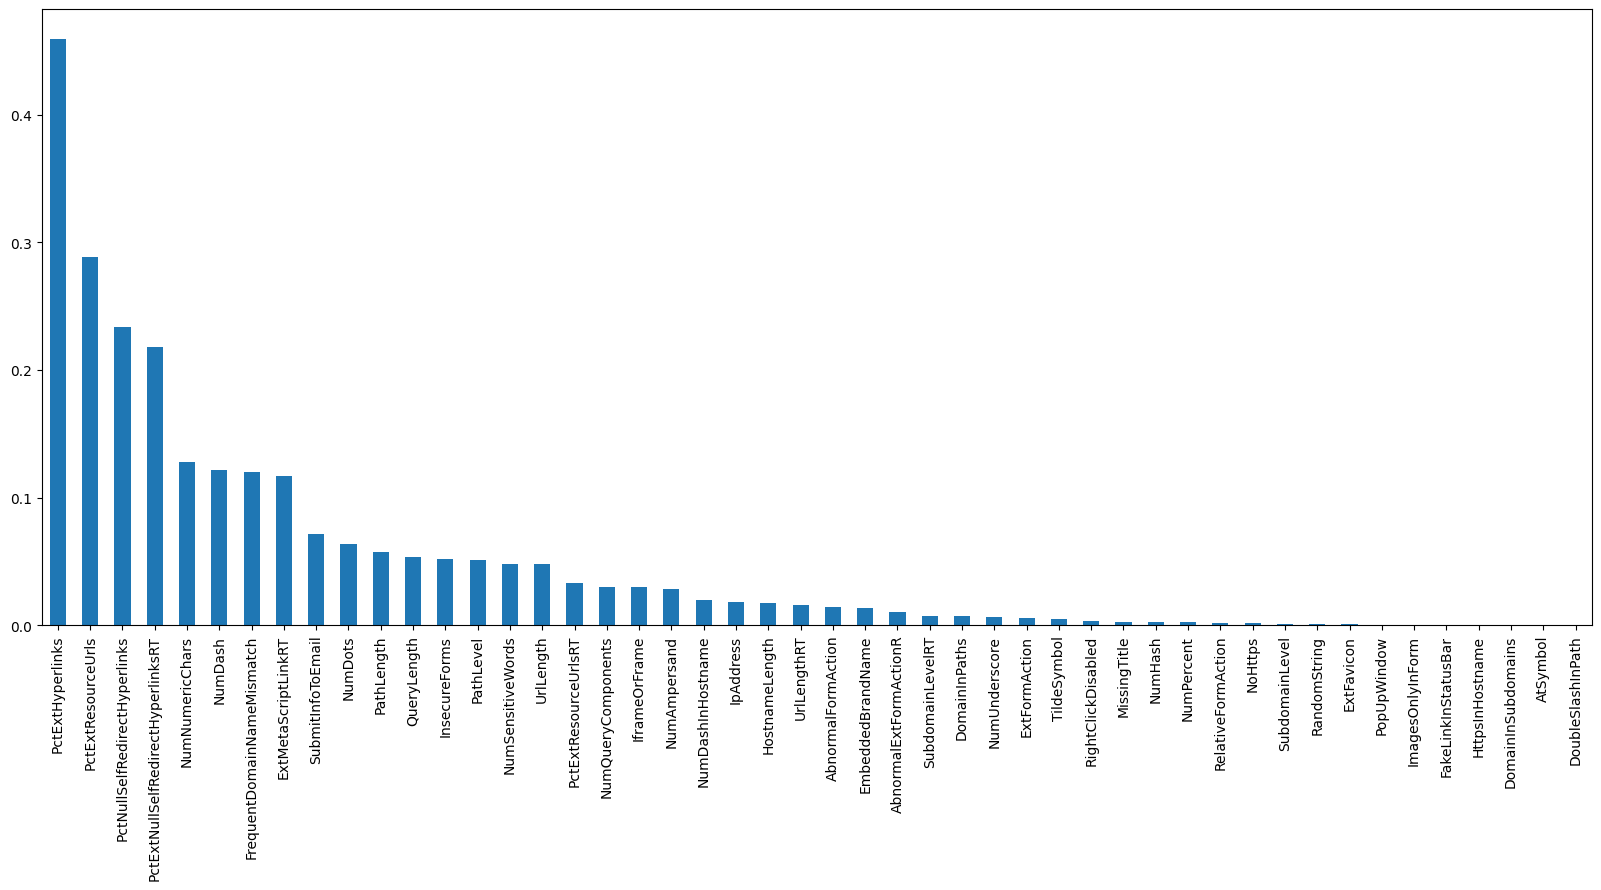

In [14]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [15]:
from sklearn.feature_selection import SelectKBest

In [16]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=30)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]
X_test.columns[sel_five_cols.get_support()]

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'TildeSymbol', 'NumUnderscore',
       'NumQueryComponents', 'NumAmpersand', 'NumNumericChars', 'IpAddress',
       'HostnameLength', 'PathLength', 'QueryLength', 'NumSensitiveWords',
       'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls',
       'InsecureForms', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'SubmitInfoToEmail', 'IframeOrFrame',
       'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT'],
      dtype='object')

In [17]:
X_train=X_train[X_train.columns[sel_five_cols.get_support()]]
X_test=X_test[X_test.columns[sel_five_cols.get_support()]]

In [18]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data without refitting
X_test = scaler.transform(X_test)

In [19]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [20]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])



Confusion Matrix:


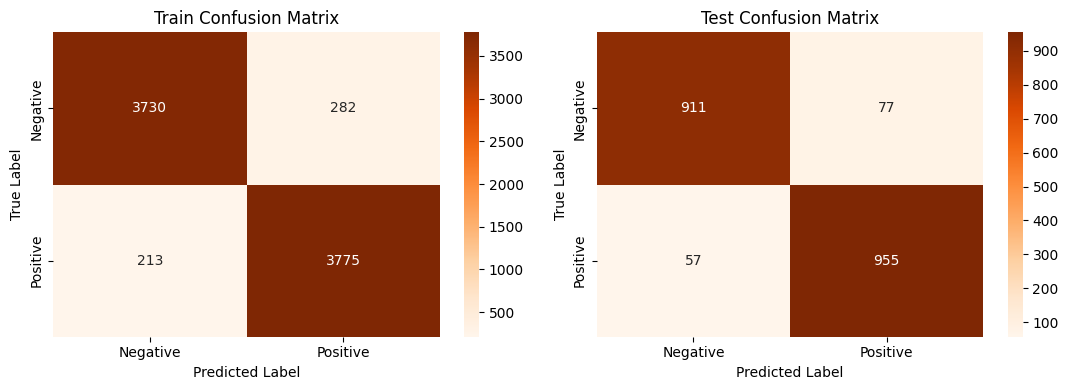


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.94598  | 0.929711 |   0.937775 | 4012        |
| 1            |    0.930491 | 0.94659  |   0.938471 | 3988        |
| accuracy     |    0.938125 | 0.938125 |   0.938125 |    0.938125 |
| macro avg    |    0.938235 | 0.93815  |   0.938123 | 8000        |
| weighted avg |    0.938259 | 0.938125 |   0.938122 | 8000        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.941116 | 0.922065 |   0.931493 |   988     |
| 1            |    0.925388 | 0.943676 |   0.934442 |  1012     |
| accuracy     |    0.933    | 0.933    |   0.933    |     0.933 |
| macro avg    |    0.933252 | 0.93287  |   0.932968 |  2000     |
| weighted avg |    0.933157 | 0.933    |   0.932985 |  

In [21]:
lg=LogisticRegression()
lr_score=evaluate_model(lg,X_train,X_test,y_train,y_test)

In [22]:
score['Logistic Regression'] = lr_score

In [23]:
score

,Logistic Regression
Precision Train,0.938259
Precision Test,0.933157
Recall Train,0.938125
Recall Test,0.933000
Accuracy Train,0.938125
Accuracy Test,0.933000
F1 macro Train,0.938122
F1 macro Test,0.932985


### 2. Cross- Validation & Hyperparameter Tuning

In [24]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [25]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


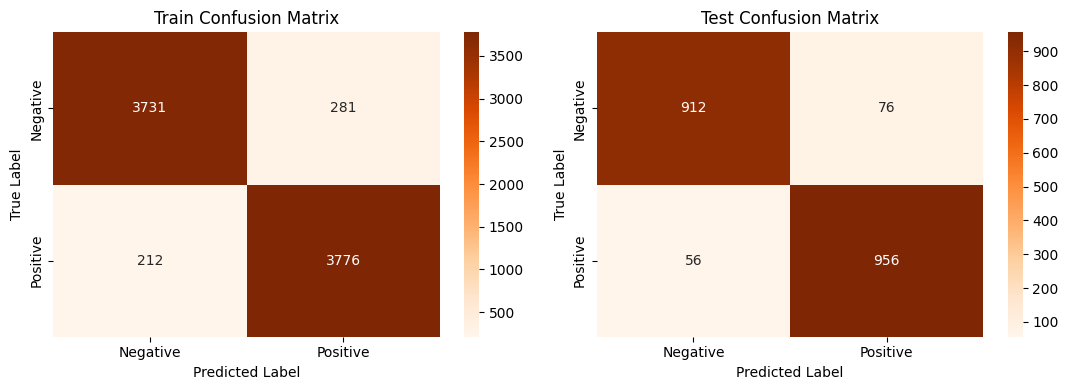


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.946234 | 0.92996  |   0.938026 | 4012        |
| 1            |    0.930737 | 0.946841 |   0.93872  | 3988        |
| accuracy     |    0.938375 | 0.938375 |   0.938375 |    0.938375 |
| macro avg    |    0.938485 | 0.9384   |   0.938373 | 8000        |
| weighted avg |    0.938509 | 0.938375 |   0.938372 | 8000        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.942149 | 0.923077 |   0.932515 |   988     |
| 1            |    0.926357 | 0.944664 |   0.935421 |  1012     |
| accuracy     |    0.934    | 0.934    |   0.934    |     0.934 |
| macro avg    |    0.934253 | 0.93387  |   0.933968 |  2000     |
| weighted avg |    0.934158 | 0.934    |   0.933985 |  

In [26]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)

In [27]:
score['Logistic Regression tunned'] = lr_score2

In [28]:
score

,Logistic Regression,Logistic Regression tunned
Precision Train,0.938259,0.938509
Precision Test,0.933157,0.934158
Recall Train,0.938125,0.938375
Recall Test,0.933000,0.934000
Accuracy Train,0.938125,0.938375
Accuracy Test,0.933000,0.934000
F1 macro Train,0.938122,0.938372
F1 macro Test,0.932985,0.933985


## ML Model - 2 : Decision Tree

In [29]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


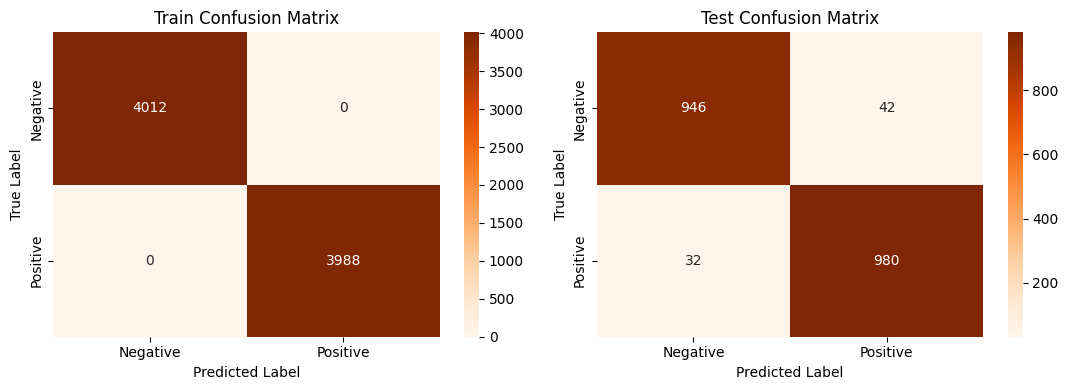


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      4012 |
| 1            |           1 |        1 |          1 |      3988 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      8000 |
| weighted avg |           1 |        1 |          1 |      8000 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.96728  | 0.95749  |   0.96236  |   988     |
| 1            |    0.958904 | 0.968379 |   0.963618 |  1012     |
| accuracy     |    0.963    | 0.963    |   0.963    |     0.963 |
| macro avg    |    0.963092 | 0.962935 |   0.962989 |  2000     |
| weighted avg |    0.963042 | 0.963    |   0.962997 |  2000     |


In [30]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

In [31]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic Regression,Logistic Regression tunned,Decision Tree
Precision Train,0.938259,0.938509,1.000000
Precision Test,0.933157,0.934158,0.963042
Recall Train,0.938125,0.938375,1.000000
Recall Test,0.933000,0.934000,0.963000
Accuracy Train,0.938125,0.938375,1.000000
Accuracy Test,0.933000,0.934000,0.963000
F1 macro Train,0.938122,0.938372,1.000000
F1 macro Test,0.932985,0.933985,0.962997


### 2. Cross- Validation & Hyperparameter Tuning

In [32]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 11, 'min_samples_split': 7}


In [33]:

# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


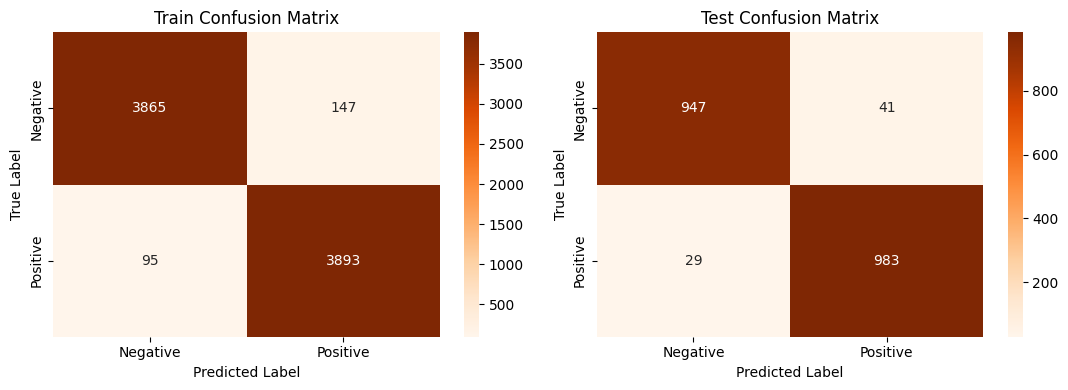


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.97601  | 0.96336  |   0.969644 | 4012       |
| 1            |    0.963614 | 0.976179 |   0.969856 | 3988       |
| accuracy     |    0.96975  | 0.96975  |   0.96975  |    0.96975 |
| macro avg    |    0.969812 | 0.969769 |   0.96975  | 8000       |
| weighted avg |    0.969831 | 0.96975  |   0.969749 | 8000       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.970287 | 0.958502 |   0.964358 |   988     |
| 1            |    0.959961 | 0.971344 |   0.965619 |  1012     |
| accuracy     |    0.965    | 0.965    |   0.965    |     0.965 |
| macro avg    |    0.965124 | 0.964923 |   0.964989 |  2000     |
| weighted avg |    0.965062 | 0.965    |   0.964996 |  2000   

In [34]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, X_train, X_test, y_train, y_test)


In [35]:
score['Decision Tree tuned'] = dt2_score
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned
Precision Train,0.938259,0.938509,1.000000,0.969831
Precision Test,0.933157,0.934158,0.963042,0.965062
Recall Train,0.938125,0.938375,1.000000,0.969750
Recall Test,0.933000,0.934000,0.963000,0.965000
Accuracy Train,0.938125,0.938375,1.000000,0.969750
Accuracy Test,0.933000,0.934000,0.963000,0.965000
F1 macro Train,0.938122,0.938372,1.000000,0.969749
F1 macro Test,0.932985,0.933985,0.962997,0.964996


## ML Model - 3 : Random Forest

In [36]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


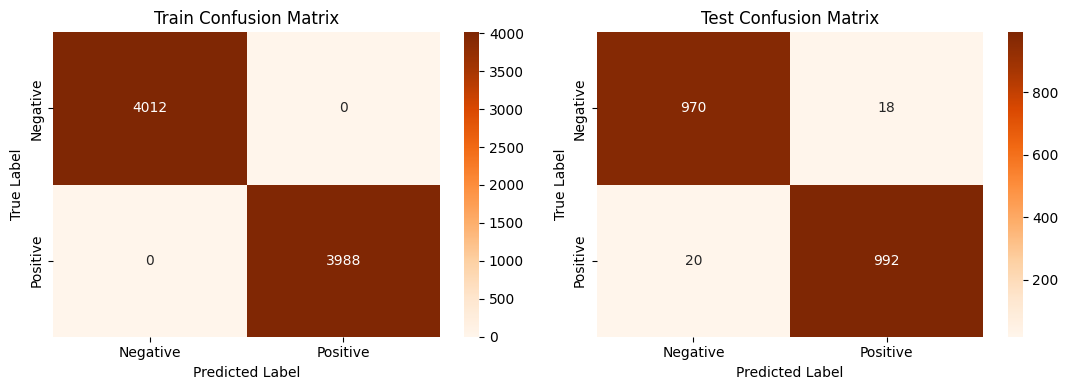


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      4012 |
| 1            |           1 |        1 |          1 |      3988 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      8000 |
| weighted avg |           1 |        1 |          1 |      8000 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.979798 | 0.981781 |   0.980789 |   988     |
| 1            |    0.982178 | 0.980237 |   0.981207 |  1012     |
| accuracy     |    0.981    | 0.981    |   0.981    |     0.981 |
| macro avg    |    0.980988 | 0.981009 |   0.980998 |  2000     |
| weighted avg |    0.981002 | 0.981    |   0.981    |  2000     |


In [37]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

In [38]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000


### 2. Cross- Validation & Hyperparameter Tuning

In [39]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 15}


In [40]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


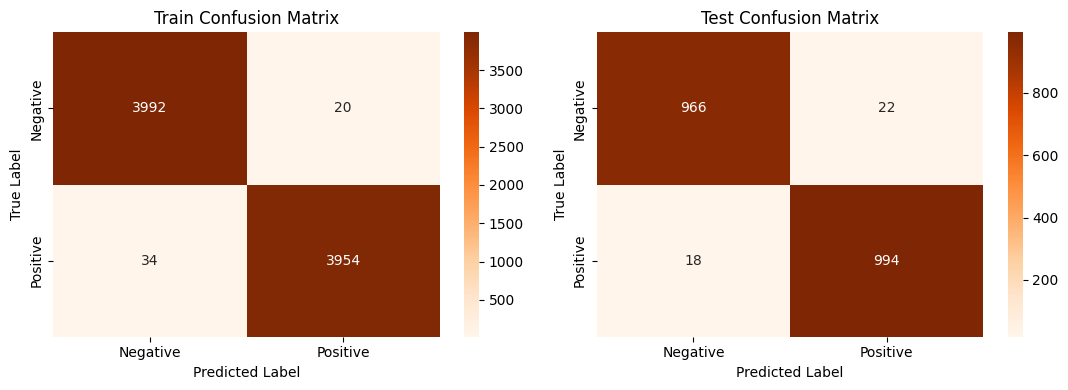


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.991555 | 0.995015 |   0.993282 | 4012       |
| 1            |    0.994967 | 0.991474 |   0.993218 | 3988       |
| accuracy     |    0.99325  | 0.99325  |   0.99325  |    0.99325 |
| macro avg    |    0.993261 | 0.993245 |   0.99325  | 8000       |
| weighted avg |    0.993256 | 0.99325  |   0.99325  | 8000       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.981707 | 0.977733 |   0.979716 |    988    |
| 1            |    0.978346 | 0.982213 |   0.980276 |   1012    |
| accuracy     |    0.98     | 0.98     |   0.98     |      0.98 |
| macro avg    |    0.980027 | 0.979973 |   0.979996 |   2000    |
| weighted avg |    0.980007 | 0.98     |   0.979999 |   2000  

In [41]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, X_train, X_test, y_train, y_test)

In [42]:
score['Random Forest tuned'] = rf2_score

In [43]:
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999


## ML Model - 4 : SVM (Support Vector Machine)

In [44]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


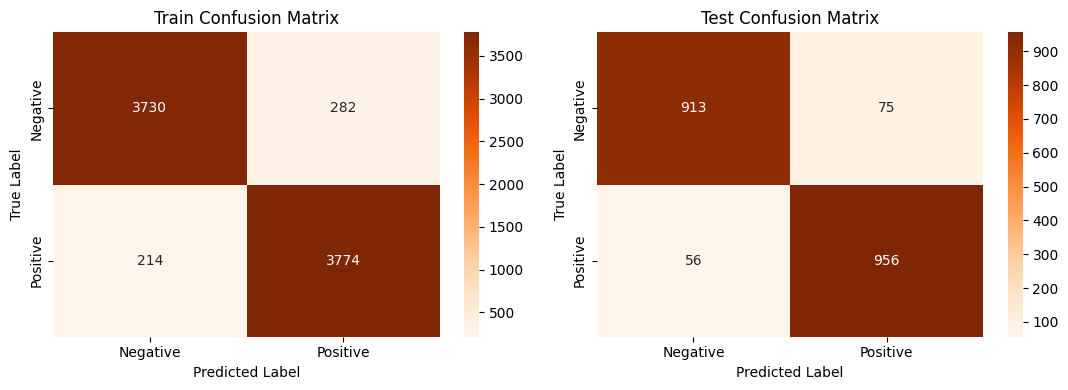


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.94574  | 0.929711 |   0.937657 |  4012     |
| 1            |    0.930473 | 0.946339 |   0.938339 |  3988     |
| accuracy     |    0.938    | 0.938    |   0.938    |     0.938 |
| macro avg    |    0.938107 | 0.938025 |   0.937998 |  8000     |
| weighted avg |    0.93813  | 0.938    |   0.937997 |  8000     |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.942208 | 0.924089 |   0.933061 |  988      |
| 1            |    0.927255 | 0.944664 |   0.935879 | 1012      |
| accuracy     |    0.9345   | 0.9345   |   0.9345   |    0.9345 |
| macro avg    |    0.934732 | 0.934377 |   0.93447  | 2000      |
| weighted avg |    0.934642 | 0.9345   |   0.934487 | 2000      |


In [45]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, X_train, X_test, y_train, y_test)


In [46]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256,0.938130
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007,0.934642
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250,0.937997
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999,0.934487


### 2. Cross- Validation & Hyperparameter Tuning

In [47]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'rbf', 'degree': 2, 'C': 5.1}


In [48]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


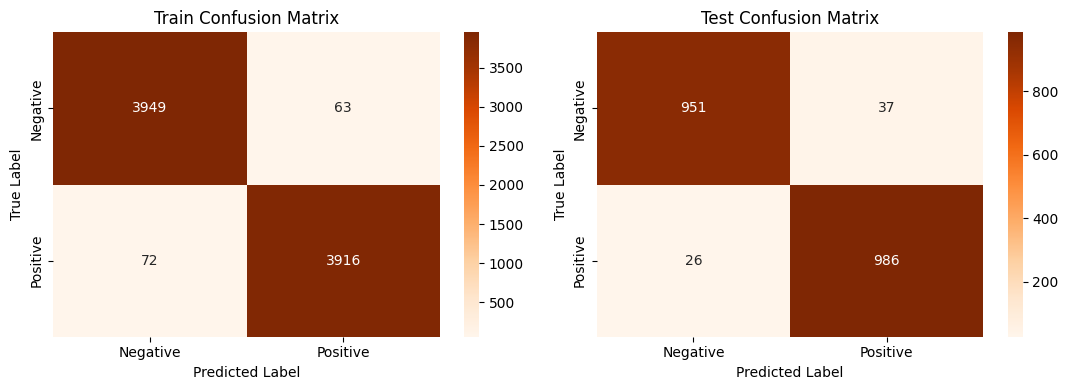


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.982094 | 0.984297 |   0.983194 | 4012        |
| 1            |    0.984167 | 0.981946 |   0.983055 | 3988        |
| accuracy     |    0.983125 | 0.983125 |   0.983125 |    0.983125 |
| macro avg    |    0.98313  | 0.983121 |   0.983125 | 8000        |
| weighted avg |    0.983127 | 0.983125 |   0.983125 | 8000        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.973388 | 0.962551 |   0.967939 |  988      |
| 1            |    0.963832 | 0.974308 |   0.969042 | 1012      |
| accuracy     |    0.9685   | 0.9685   |   0.9685   |    0.9685 |
| macro avg    |    0.96861  | 0.968429 |   0.96849  | 2000      |
| weighted avg |    0.968553 | 0.9685   |   0.968497 | 2

In [49]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, X_train, X_test, y_train, y_test)

In [50]:
score['SVM tuned'] = svm2_score
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256,0.938130,0.983127
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007,0.934642,0.968553
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250,0.937997,0.983125
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999,0.934487,0.968497


## ML Model - 5 : Xtreme Gradient Boosting

In [51]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier()

# Model is trained (fit) and predicted in the evaluate model
     


Confusion Matrix:


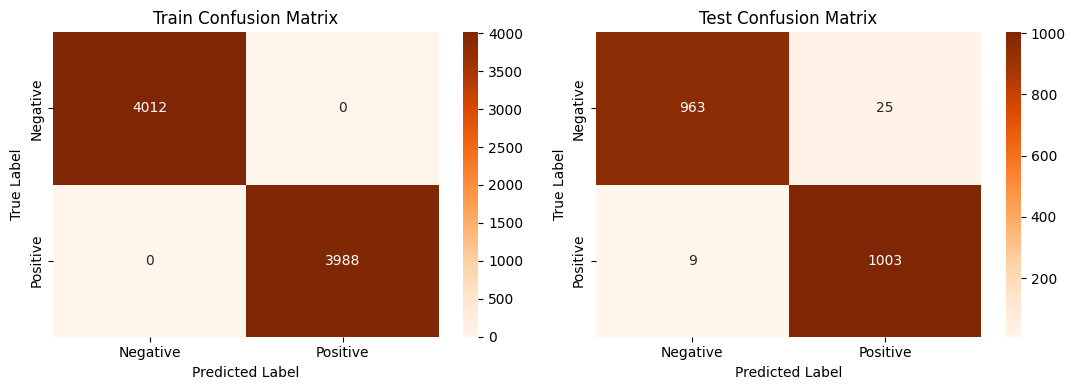


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |      4012 |
| 1            |           1 |        1 |          1 |      3988 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      8000 |
| weighted avg |           1 |        1 |          1 |      8000 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.990741 | 0.974696 |   0.982653 |   988     |
| 1            |    0.975681 | 0.991107 |   0.983333 |  1012     |
| accuracy     |    0.983    | 0.983    |   0.983    |     0.983 |
| macro avg    |    0.983211 | 0.982902 |   0.982993 |  2000     |
| weighted avg |    0.98312  | 0.983    |   0.982997 |  2000     |


In [52]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

In [53]:

# Updated Evaluation metric Score Chart
score['XGB'] = xgb_score
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256,0.938130,0.983127,1.000000
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007,0.934642,0.968553,0.983120
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250,0.937997,0.983125,1.000000
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999,0.934487,0.968497,0.982997


## 2. Cross- Validation & Hyperparameter Tuning


In [54]:

# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2 = xgb.XGBClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 180, 'max_depth': 5, 'learning_rate': 0.23}


In [55]:
# Initialize model with best parameters
xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Confusion Matrix:


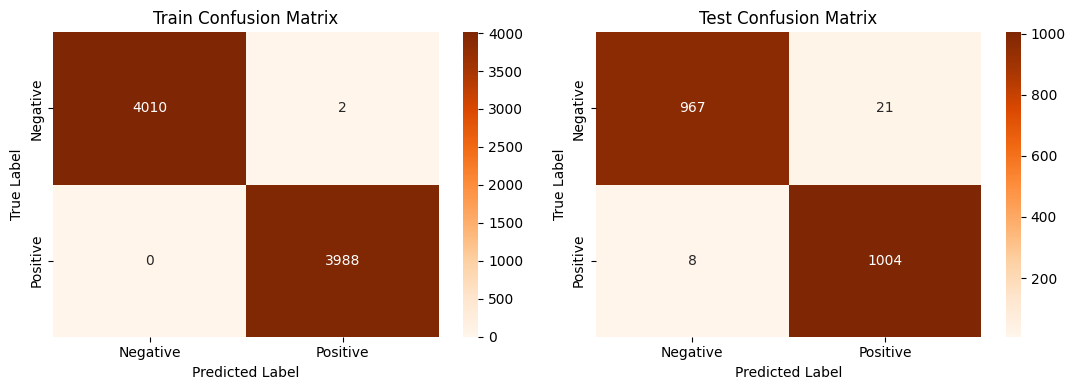


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 0.999501 |   0.999751 | 4012       |
| 1            |    0.999499 | 1        |   0.999749 | 3988       |
| accuracy     |    0.99975  | 0.99975  |   0.99975  |    0.99975 |
| macro avg    |    0.999749 | 0.999751 |   0.99975  | 8000       |
| weighted avg |    0.99975  | 0.99975  |   0.99975  | 8000       |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.991795 | 0.978745 |   0.985227 |  988      |
| 1            |    0.979512 | 0.992095 |   0.985763 | 1012      |
| accuracy     |    0.9855   | 0.9855   |   0.9855   |    0.9855 |
| macro avg    |    0.985654 | 0.98542  |   0.985495 | 2000      |
| weighted avg |    0.98558  | 0.9855   |   0.985498 | 2000    

In [56]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb_model2, X_train, X_test, y_train, y_test)

In [57]:

score['XGB tuned'] = xgb2_score

In [58]:
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256,0.938130,0.983127,1.000000,0.999750
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007,0.934642,0.968553,0.983120,0.985580
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250,0.937997,0.983125,1.000000,0.999750
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999,0.934487,0.968497,0.982997,0.985498


## ML Model - 6 : Naive Bayes


In [59]:
# ML Model - 6 Implementation
nb_model = GaussianNB()

# Model is trained (fit) and predicted in the evaluate model
     


Confusion Matrix:


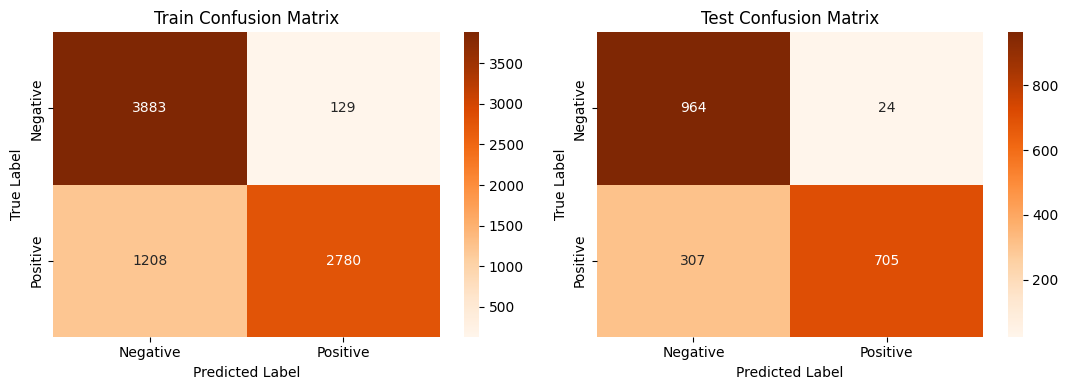


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.762719 | 0.967846 |   0.853125 | 4012        |
| 1            |    0.955655 | 0.697091 |   0.806148 | 3988        |
| accuracy     |    0.832875 | 0.832875 |   0.832875 |    0.832875 |
| macro avg    |    0.859187 | 0.832469 |   0.829636 | 8000        |
| weighted avg |    0.858897 | 0.832875 |   0.829707 | 8000        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.758458 | 0.975709 |   0.853475 |  988      |
| 1            |    0.967078 | 0.69664  |   0.809879 | 1012      |
| accuracy     |    0.8345   | 0.8345   |   0.8345   |    0.8345 |
| macro avg    |    0.862768 | 0.836174 |   0.831677 | 2000      |
| weighted avg |    0.86402  | 0.8345   |   0.831416 | 2

In [60]:
# Visualizing evaluation Metric Score chart
nb_score = evaluate_model(nb_model, X_train, X_test, y_train, y_test)

In [61]:
# Updated Evaluation metric Score Chart
score['Naive Bayes'] = nb_score
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256,0.938130,0.983127,1.000000,0.999750,0.858897
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007,0.934642,0.968553,0.983120,0.985580,0.864020
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750,0.832875
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500,0.834500
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750,0.832875
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500,0.834500
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250,0.937997,0.983125,1.000000,0.999750,0.829707
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999,0.934487,0.968497,0.982997,0.985498,0.831416


### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the model
naive = GaussianNB()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
GridSearch.fit(X_train, y_train)

# Select the best hyperparameters
best_params = GridSearch.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.01873817422860384}


In [63]:
# Initiate model with best parameters
nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


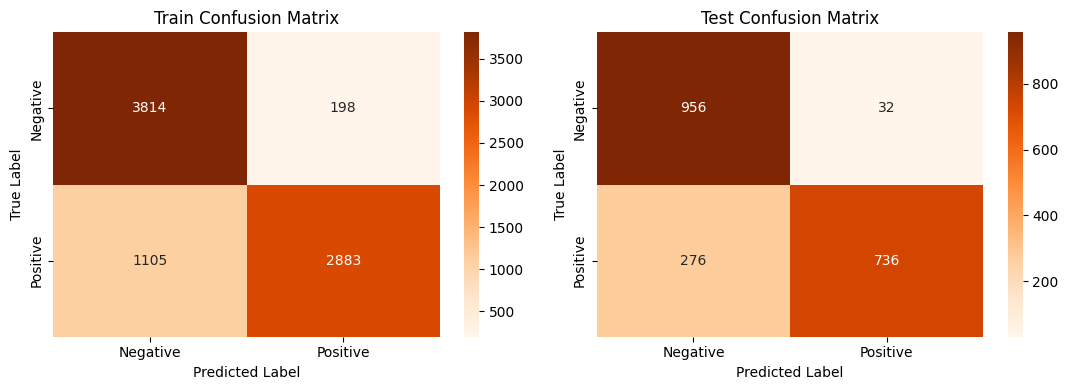


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.775361 | 0.950648 |   0.854104 | 4012        |
| 1            |    0.935735 | 0.722919 |   0.815674 | 3988        |
| accuracy     |    0.837125 | 0.837125 |   0.837125 |    0.837125 |
| macro avg    |    0.855548 | 0.836783 |   0.834889 | 8000        |
| weighted avg |    0.855307 | 0.837125 |   0.834947 | 8000        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.775974 | 0.967611 |   0.861261 |   988     |
| 1            |    0.958333 | 0.727273 |   0.826966 |  1012     |
| accuracy     |    0.846    | 0.846    |   0.846    |     0.846 |
| macro avg    |    0.867154 | 0.847442 |   0.844114 |  2000     |
| weighted avg |    0.868248 | 0.846    |   0.843908 |  

In [64]:
# Visualizing evaluation Metric Score chart
nb2_score = evaluate_model(nb_model2, X_train, X_test, y_train, y_test)

In [65]:
score['Naive Bayes tuned']= nb2_score

In [66]:
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256,0.938130,0.983127,1.000000,0.999750,0.858897,0.855307
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007,0.934642,0.968553,0.983120,0.985580,0.864020,0.868248
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750,0.832875,0.837125
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500,0.834500,0.846000
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750,0.832875,0.837125
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500,0.834500,0.846000
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250,0.937997,0.983125,1.000000,0.999750,0.829707,0.834947
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999,0.934487,0.968497,0.982997,0.985498,0.831416,0.843908


## ML Model - 7 : Neural Network


In [67]:

# ML Model - 7 Implementation
nn_model = MLPClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


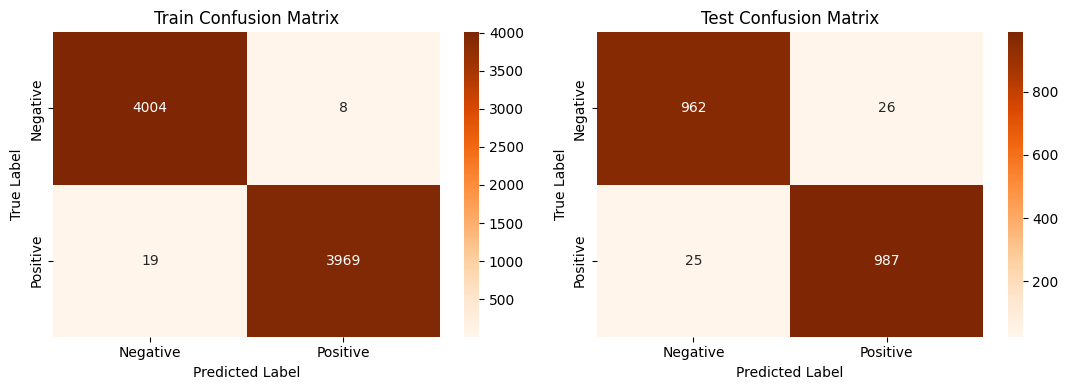


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995277 | 0.998006 |   0.99664  | 4012        |
| 1            |    0.997988 | 0.995236 |   0.99661  | 3988        |
| accuracy     |    0.996625 | 0.996625 |   0.996625 |    0.996625 |
| macro avg    |    0.996633 | 0.996621 |   0.996625 | 8000        |
| weighted avg |    0.996629 | 0.996625 |   0.996625 | 8000        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.974671 | 0.973684 |   0.974177 |  988      |
| 1            |    0.974334 | 0.975296 |   0.974815 | 1012      |
| accuracy     |    0.9745   | 0.9745   |   0.9745   |    0.9745 |
| macro avg    |    0.974502 | 0.97449  |   0.974496 | 2000      |
| weighted avg |    0.9745   | 0.9745   |   0.9745   | 2

In [68]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(nn_model, X_train, X_test, y_train, y_test)

In [69]:
# Updated Evaluation metric Score Chart
score['Neural Network'] = neural_score
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256,0.938130,0.983127,1.000000,0.999750,0.858897,0.855307,0.996629
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007,0.934642,0.968553,0.983120,0.985580,0.864020,0.868248,0.974500
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750,0.832875,0.837125,0.996625
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500,0.834500,0.846000,0.974500
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750,0.832875,0.837125,0.996625
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500,0.834500,0.846000,0.974500
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250,0.937997,0.983125,1.000000,0.999750,0.829707,0.834947,0.996625
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999,0.934487,0.968497,0.982997,0.985498,0.831416,0.843908,0.974500


### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model
neural = MLPClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)
     

Best hyperparameters:  {'hidden_layer_sizes': 50, 'alpha': 0.0014000000000000002}


In [71]:
# Initiate model with best parameters
nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Confusion Matrix:


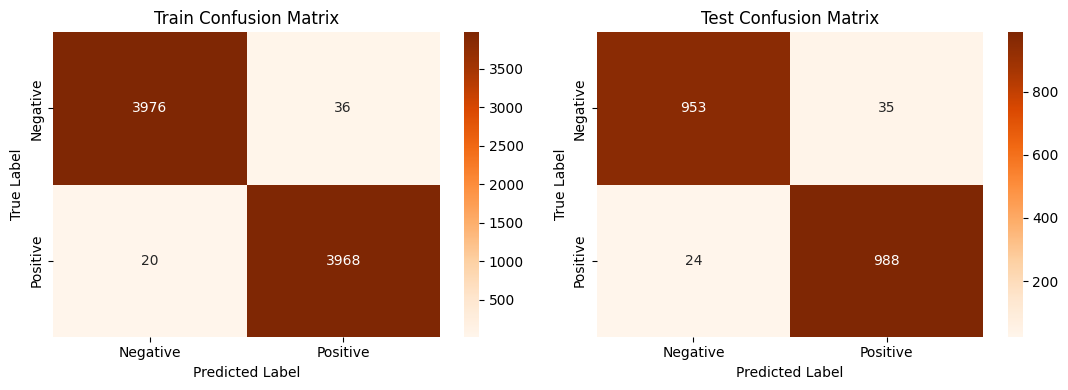


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.994995 | 0.991027 |   0.993007 |  4012     |
| 1            |    0.991009 | 0.994985 |   0.992993 |  3988     |
| accuracy     |    0.993    | 0.993    |   0.993    |     0.993 |
| macro avg    |    0.993002 | 0.993006 |   0.993    |  8000     |
| weighted avg |    0.993008 | 0.993    |   0.993    |  8000     |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.975435 | 0.964575 |   0.969975 |  988      |
| 1            |    0.965787 | 0.976285 |   0.971007 | 1012      |
| accuracy     |    0.9705   | 0.9705   |   0.9705   |    0.9705 |
| macro avg    |    0.970611 | 0.97043  |   0.970491 | 2000      |
| weighted avg |    0.970553 | 0.9705   |   0.970497 | 2000      |


In [72]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(nn_model2, X_train, X_test, y_train, y_test)

In [73]:
score['Neural Network tuned']= neural2_score

In [74]:
# Updated Evaluation metric Score Chart
score

,Logistic Regression,Logistic Regression tunned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.938259,0.938509,1.000000,0.969831,1.000000,0.993256,0.938130,0.983127,1.000000,0.999750,0.858897,0.855307,0.996629,0.993008
Precision Test,0.933157,0.934158,0.963042,0.965062,0.981002,0.980007,0.934642,0.968553,0.983120,0.985580,0.864020,0.868248,0.974500,0.970553
Recall Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750,0.832875,0.837125,0.996625,0.993000
Recall Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500,0.834500,0.846000,0.974500,0.970500
Accuracy Train,0.938125,0.938375,1.000000,0.969750,1.000000,0.993250,0.938000,0.983125,1.000000,0.999750,0.832875,0.837125,0.996625,0.993000
Accuracy Test,0.933000,0.934000,0.963000,0.965000,0.981000,0.980000,0.934500,0.968500,0.983000,0.985500,0.834500,0.846000,0.974500,0.970500
F1 macro Train,0.938122,0.938372,1.000000,0.969749,1.000000,0.993250,0.937997,0.983125,1.000000,0.999750,0.829707,0.834947,0.996625,0.993000
F1 macro Test,0.932985,0.933985,0.962997,0.964996,0.981000,0.979999,0.934487,0.968497,0.982997,0.985498,0.831416,0.843908,0.974500,0.970497


In [75]:
print(score.to_markdown())

|                 |   Logistic Regression |   Logistic Regression tunned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|-----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.938259 |                     0.938509 |        1        |              0.969831 |        1        |              0.993256 | 0.93813  |    0.983127 | 1        |    0.99975  |      0.858897 |            0.855307 |         0.996629 |               0.993008 |
| Precision Test  |              0.933157 |                     0.934158 |        0.963042 |              0.965062 |        0.9

# ***Selection of best model***


In [80]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj
     

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
Logistic Regression,0.938259,0.933157,0.938125,0.9330,0.938125,0.9330,0.938122,0.932985
Logistic Regression tunned,0.938509,0.934158,0.938375,0.9340,0.938375,0.9340,0.938372,0.933985
Decision Tree tuned,0.969831,0.965062,0.969750,0.9650,0.969750,0.9650,0.969749,0.964996
SVM,0.938130,0.934642,0.938000,0.9345,0.938000,0.9345,0.937997,0.934487
Naive Bayes,0.858897,0.864020,0.832875,0.8345,0.832875,0.8345,0.829707,0.831416
Naive Bayes tuned,0.855307,0.868248,0.837125,0.8460,0.837125,0.8460,0.834947,0.843908


In [81]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [82]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Decision Tree tuned - 0.9651
Recall: Decision Tree tuned - 0.965
Accuracy: Decision Tree tuned - 0.965
F1 macro: Decision Tree tuned - 0.965


In [83]:
# Take recall as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)
new_score.index.name = 'Classification Model'
print(new_score.to_markdown())

| Classification Model       |   Recall Train |   Recall Test |
|:---------------------------|---------------:|--------------:|
| Logistic Regression        |       0.938125 |        0.933  |
| Logistic Regression tunned |       0.938375 |        0.934  |
| Decision Tree tuned        |       0.96975  |        0.965  |
| SVM                        |       0.938    |        0.9345 |
| Naive Bayes                |       0.832875 |        0.8345 |
| Naive Bayes tuned          |       0.837125 |        0.846  |


## 1. Which Evaluation metrics did i consider for a positive business impact and why?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our Phishing domain detection model. This means that our goal is to maximize the number of true positives (correctly identified the different phishing domains) while minimizing the number of false negatives (incorrectly identified the flowers not a phishing domain). By doing so, we aim to ensure that we correctly identify phishing domain, even if it means that we may have some false positives.

## 2. Which ML model did i choose from the above created models as our final prediction model and why?

After evaluating the performance of several machine learning models on the dataset, I have selected the tuned Decesion tree tuned as our final prediction model. This decision was based on the model’s performance on our primary evaluation metric of recall, which measures the ability of the model to correctly identify phishing domain . In our analysis, we found that the Decesion tree classifier (tuned) had the highest recall score among the models we evaluated.

I choose recall as the primary evaluation metric because correctly identifying phishing domain are critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify phishing domain as possible, even if it means that we may have some false positives. Overall, we believe that the Decesion tree (tuned) is the best choice for our needs and will help us achieve a positive business impact.

## 3. Explain the model which i have used for the prediction

In [84]:
# Define a list of category labels for reference.
Category_RF = ['Phishing','Not Phishing']

In [114]:
# In this example, we take random data point .
x_rf = np.array([np.random.randn(30)])

# Use the tuned decesion tree model (dt_model2) to make a prediction.
x_rf_prediction = dt_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Not Phishing


In [115]:
# In this example, we take random data point .
x_rf = np.array([np.random.randn(30)])

# Use the tuned decesion tree  (dt_model2) to make a prediction.
x_rf_prediction = dt_model2.predict(x_rf)
x_rf_prediction[0]

# Display the predicted category label.
print(Category_RF[int(x_rf_prediction[0])])

Phishing


# Conclusion

In the Phishing Domain Detection project, the tuned decesion tree model has been selected as the final prediction model. The project aimed to detect domain whether it is phishing or not phishing. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

1. **Data Exploration**: Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that phishing domain have distinct propertis compared to the legitimate domain.
2. **Data Preprocessing**: Data preprocessing steps, including feature selection or feature scaling, were performed to prepare the dataset for modeling.
3. **Model Selection**: After experimenting with various machine learning models, tuned decesion tree was chosen as the final model due to its simplicity, interpretability, and good performance in detecting phishing domain.
4. **Model Training and Evaluation**: The Decesion tree (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in detecting phishing domain.
5. **Challenges and Future Work**: The project encountered challenges related to feature selection and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.
6. **Practical Application**: The phishing domain detection model can be applied in real-world scenarios, such as cyber security and help government etc, to automate the identification of phishing domains.

In conclusion, the phishing domain detection project successfully employed Decesion tree (tuned) as the final prediction model to classify domains. The project's outcomes have practical implications in the field of cyber security. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.